<a href="https://colab.research.google.com/github/seirah-yang/F_roject/blob/main/12_%ED%85%8C%EC%9D%B4%EB%B8%94_%EC%A0%95%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 데이터프레임에서 누락되거나 중복된 데이터 찾기
2) 누락된 데이터를 찾은 후 특정 값으로 채우기
3) 중복된 불필요한 데이터를 찾은 후 제거하기

## 누락 & 중복된 데이터 찾기

- 의료 분야에서 미묘한 데이터 차이나 누락, 중복 등의 문제로 환자의 치료나 진단에 직접적인 영향을 미친다.
- 누락 혹은 중복된 데이터를 찾아 처리하는 것인 필수
- pandas Lybrary는 누락된 데이터를 찾거나 중복 데이터를 제거하는 작업을 간편하게 처리가 가능하다.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/heart-failure-clinical-records")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-failure-clinical-records' dataset.
Path to dataset files: /kaggle/input/heart-failure-clinical-records


In [1]:
# 필요한 라이브러리 임포트
import os
import pandas as pd

path = "/kaggle/input/heart-failure-clinical-records"
print(os.listdir(path))

['Heart Failure Clinical Records.csv']


In [2]:
import os

df_hf = pd.read_csv(os.path.join(path, 'Heart Failure Clinical Records.csv'))

In [3]:
df_hf.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 누락된 데이터값 (NaN) 찾기
- 누락된 데이터는 NaN로 표현되며 이는 Not a Number 약자로, pandas에서는 np.nan으로 표현된다.
- isnull() 함수는 데이터프레임에서 누락된 데이터를 Boolean값으로 표현한다.
- notnull()함수는 누락되지 않은 데이터를 Boolean값으로 표현한다.
- NaN 여부에 따라 False | True로 반환한다.


In [4]:
df_hf = pd.DataFrame({
    'A': [1,2,None,4],
    'B': [5, None, 7,8]
})
df_hf.isnull()

,A,B
0,False,False
1,False,True
2,True,False
3,False,False


In [5]:
df_hf.columns

Index(['A', 'B'], dtype='object')

### 모든 열에 대한 NaN 비율(%) 출력

모든 열에 대한 누락된 값 NaN의 비율을 계산하여 출력할 수 있다.

In [4]:
# % of missing 을 df의 모든 column들에 대해 구함
import numpy as np

for col in df_hf.columns:
    pct_missing = np.mean(df_hf[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))

age-0%
anaemia-0%
creatinine_phosphokinase-0%
diabetes-0%
ejection_fraction-0%
high_blood_pressure-0%
platelets-0%
serum_creatinine-0%
serum_sodium-0%
sex-0%
smoking-0%
time-0%
DEATH_EVENT-0%


## fillna()를 활용하여 Missing값을 대체
: 데이터프레임이나 시리즈에서 누락된값 혹은 주어진 값으로 채워넣을 때 사용

    NaN값 또는 빈칸을 채워줄 수 있다.
    주의할 점 : 잘못된 값을 채워넣게 되는 경우, 데이터의 특성이나 패턴이 왜곡될 수 있다.
     ← 누락된 값의 원인을 파악하고, 데이터의 패턴을 고려하여 값을 대체해야 한다.

- 참고 할만 한 사이트 : https://stefvanbuuren.name/fimd/sec-MCAR.htm

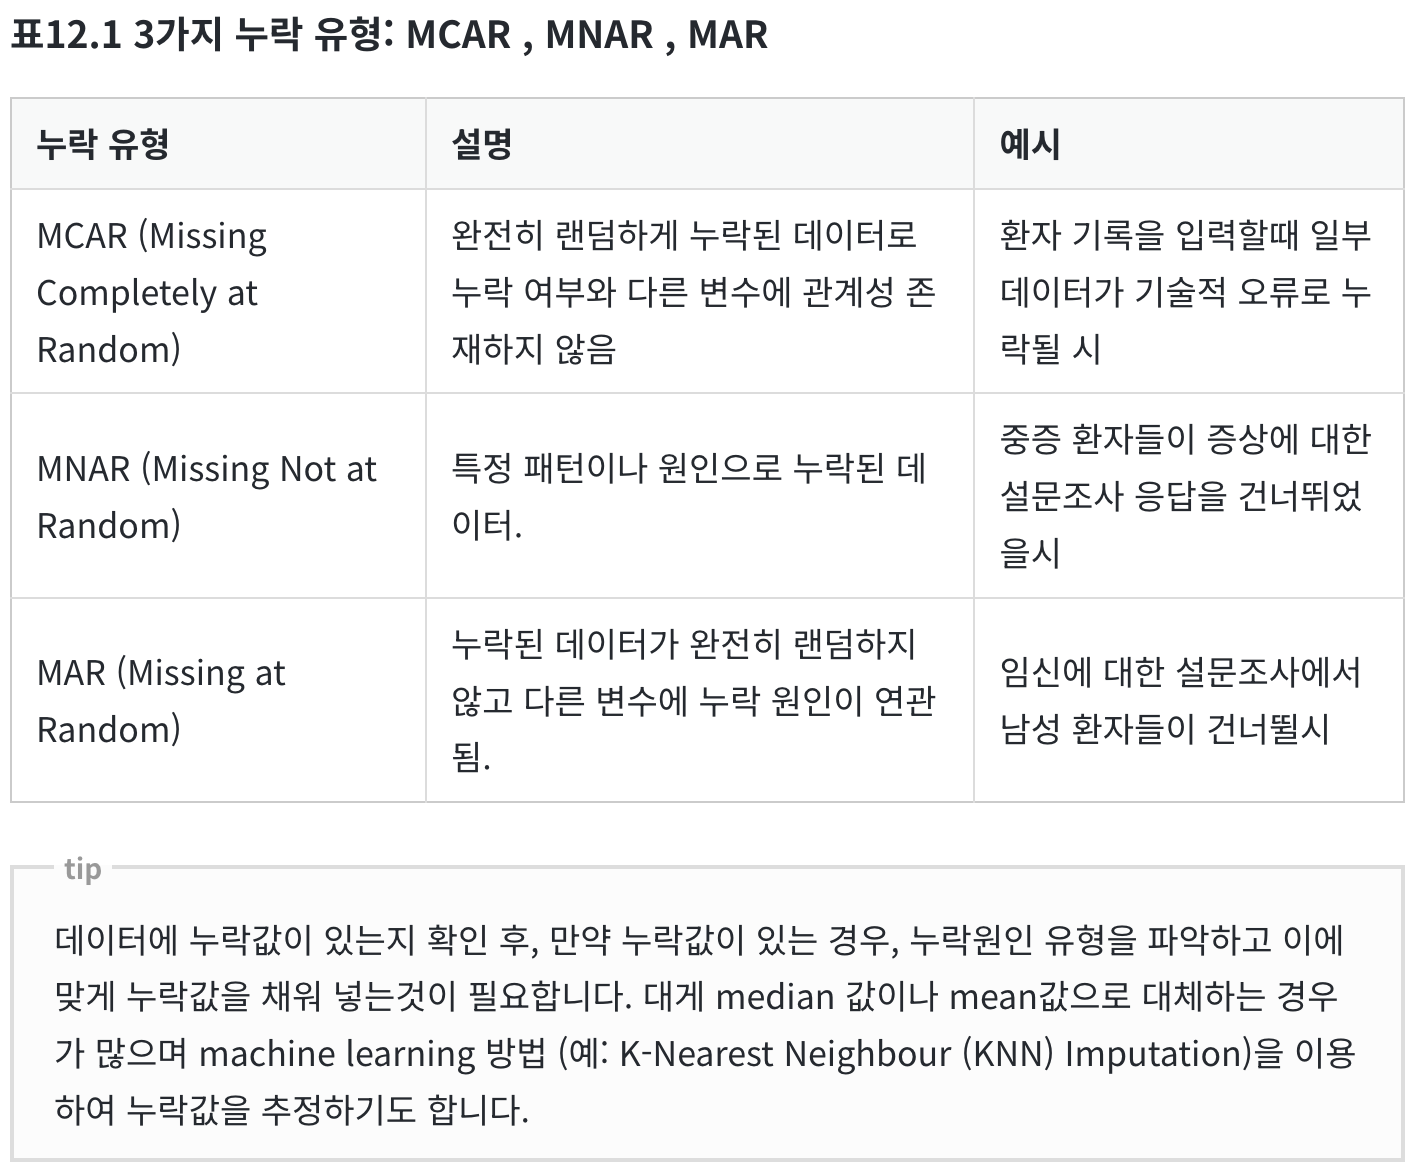

### fillna(constants): 결측값을 0으로 대체할 시 fillna(0)을 사용할 수 있음

- MCAR, MNAR, MAR을 확인하여 어떤 값으로 NAN을 대체할 것인지 결정

### fillna(med): 중앙값으로 누락값 대체

In [5]:
# 'serum_sodium_median' 새로운 열 생성 후 초기값 NaN 으로 설정
df_hf['serum_sodium_median'] = np.nan
df_hf['serum_sodium_median']

,serum_sodium_median
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
294,NaN
295,NaN
296,NaN
297,NaN


In [6]:
# serum_sodium와 serum_sodium_medium열의 상위 5개 값 확인
df_hf[['serum_sodium', 'serum_sodium_median' ] ].head()

,serum_sodium,serum_sodium_median
0,130,NaN
1,136,NaN
2,129,NaN
3,137,NaN
4,116,NaN


In [7]:
# serum_sodium 열의 중앙값 계산
med = df_hf['serum_sodium'].median()
print(med)

137.0


In [9]:
#중앙값으로 대체 (137.0)
df_hf['serum_sodium_median'] = df_hf['serum_sodium_median'].fillna(med)
df_hf['serum_sodium_median']

,serum_sodium_median
0,137.0
1,137.0
2,137.0
3,137.0
4,137.0
...,...
294,137.0
295,137.0
296,137.0
297,137.0


In [10]:
df_hf[['serum_sodium', 'serum_sodium_median']].head()

,serum_sodium,serum_sodium_median
0,130,137.0
1,136,137.0
2,129,137.0
3,137,137.0
4,116,137.0


In [11]:
df_hf['serum_sodium_median'][1]

np.float64(137.0)

### 중복된 데이터 제거

- 중복된 데이터는 분석의 정확도를 저하시킨다.
- 모델의 학습과정에 영향을 미치기 때문에 제거하는 과정이 필요하다.
- dropna() :  누락된 값 NaN이 있는 행을 제거하는데 사용 된다.

- subset: parameter , 해당 열에서만 NaN값을 찾아 제거한다.

In [12]:
df_hf['serum_sodium_median'][1] = np.nan
df_hf['serum_sodium_median'].head(3)

/tmp/ipython-input-90712885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hf['serum_sodium_median'][1] = np.nan


,serum_sodium_median
0,137.0
1,NaN
2,137.0


In [13]:
# NaN값이 있는 행 삭제
df_hf.dropna(subset = ['serum_sodium_median']).head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum_sodium_median
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,137.0
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,137.0
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1,137.0


### 중복된 행 확인
- 중복된 행이 있는 경우 duplicated()함수로 확인
- drop_duplicated()함수를 사용하여 제거

In [16]:
#duplicated 함수로 중복된 행 Boolean반환
df_hf.duplicated(subset=['smoking'])

,0
0,False
1,True
2,False
3,True
4,True
...,...
294,True
295,True
296,True
297,True


In [17]:
# 중복된 행을 제거
df_hf. drop_duplicates(subset =[ 'smoking'])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,serum_sodium_median
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,137.0
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,137.0
